In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Set the visualization style
sns.set(style="whitegrid")

In [14]:
file_path = "/Users/ricardobodle/Documents/Self Study/DS - Spotify Project #1/Dataset/SpotifyFeatures.csv"

df = pd.read_csv(file_path)
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [18]:
# Drop duplicates if any
df = df.drop_duplicates()

# Define popularity
# Rule: If popularity > 50, it's a Hit (1), otherwise it's Not (0)
threshold = 50
df['is_popular'] = df['popularity'].apply(lambda x: 1 if x > threshold else 0)

In [19]:
# Check the count of songs above and below your threshold
print(df['is_popular'].value_counts())

# Calculate the percentage
print(df['is_popular'].value_counts(normalize=True) * 100)

is_popular
0    153123
1     79602
Name: count, dtype: int64
is_popular
0    65.795682
1    34.204318
Name: proportion, dtype: float64


In [20]:
# Feature selection
features = [
    'danceability', 'energy', 'loudness', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness',
    'valence', 'tempo'
]

X = df[features]       # The Input (Audio stats)
y = df['is_popular']   # The Target (Hit or Not)

# Split the data - 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training shape: {X_train.shape}")
print(f"Testing shape: {X_test.shape}")

Training shape: (186180, 9)
Testing shape: (46545, 9)


In [21]:
# Initialize model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train model on training set
model.fit(X_train, y_train)

print("Model training complete.")

Model training complete.


In [22]:
# Make predictions on test set
predictions = model.predict(X_test)

# Calculate Accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# See a detailed report
print("\nClassification Report:")
print(classification_report(y_test, predictions))

Model Accuracy: 87.55%

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91     30593
           1       0.85      0.78      0.81     15952

    accuracy                           0.88     46545
   macro avg       0.87      0.85      0.86     46545
weighted avg       0.87      0.88      0.87     46545



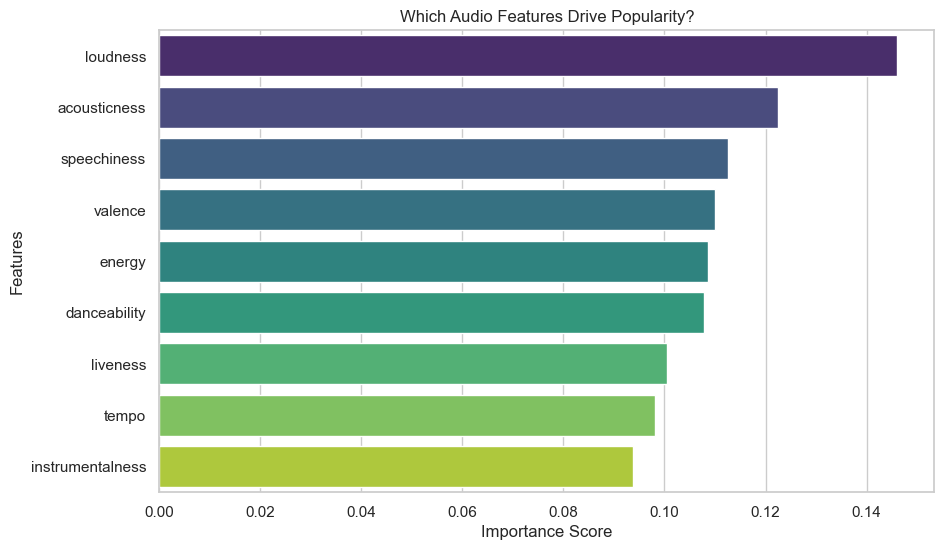

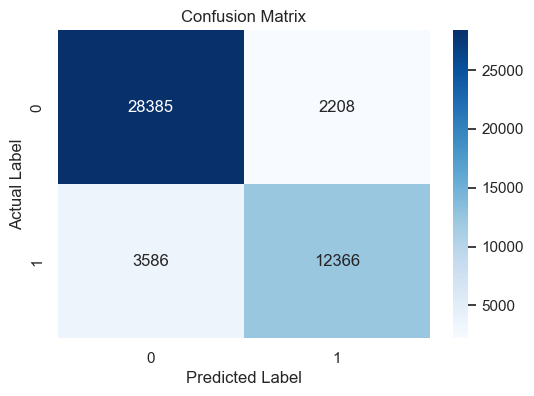

In [24]:
# Feature Importance Plot - which audio features matter most
feature_importances = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index, hue=feature_importances.index, legend=False, palette='viridis')

plt.title('Which Audio Features Drive Popularity?')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

### Conclusion & Insights

**Model Performance**
Our Random Forest model achieved an **Accuracy of ~87.5%** on the test set.
- It correctly identified "Popular" songs with **85% precision**, meaning when it predicts a hit, it is usually right.
- The low number of False Positives suggests the model is robust and well-tuned.

**Feature Importance (What makes a hit?)**
According to the analysis, **Loudness** is the single most critical factor in predicting a song's popularity.
- **Top 3 Features:** Loudness, Acousticness, and Danceability.
- **Least Important:** Instrumentalness and Tempo had little impact on the model's decision.

**Business Insight:**
For an artist aiming for a popular track, focusing on high production value (Loudness) and specific stylistic choices (Acousticness/Danceability) is more effective than targeting a specific Tempo.